<a href="https://colab.research.google.com/github/Haider-q/Deep-Learning-Assignments/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import os
from os import listdir 
from os.path import join 
import cv2 
import pathlib
from pathlib import Path
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [149]:
directory = Path('/content/drive/MyDrive/flowers')

In [150]:
flowers = []
features = []
labels = []

for dir in directory.iterdir():
  flowers.append(dir.name)
  print(dir.name)
  for imgpath in dir.iterdir():
    if imgpath.name.endswith("jpg"):
      labels.append(dir.name)
      imgarr = cv2.imread(str(imgpath), cv2.IMREAD_GRAYSCALE)
      imgarr = cv2.resize(imgarr, (150,150))
      features.append(imgarr)

tulip
flowers
rose
dandelion
daisy
sunflower


In [151]:
labels = LabelEncoder().fit_transform(labels)
labels=to_categorical(labels)

In [152]:
image_names=np.asarray(flowers)
image_names.shape

(6,)

In [153]:
data = np.asarray(features).reshape(90,150*150)
data = data.astype("float32")/255.0

In [154]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=.40,random_state=1)

In [155]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import losses,optimizers,regularizers

network = Sequential()

network.add(Dense(256,kernel_regularizer=regularizers.l2(0.001),activation="relu",input_shape=(x_train.shape[1],)))
network.add(Dense(128,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
network.add(Dense(64,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
network.add(Dense(32,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
network.add(Dense(5,activation="softmax"))

In [156]:
network.compile(loss='sparse_categorical_crossentropy',optimizer='rmsPROP',metrics=['accuracy'])

In [157]:
batch_size = 20
epochs = 135
history=network.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/135
3/3 [==============================] - 1s 73ms/step - loss: 1.8719 - accuracy: 0.4398
Epoch 2/135
3/3 [==============================] - 0s 79ms/step - loss: 0.7902 - accuracy: 1.0000
Epoch 3/135
3/3 [==============================] - 0s 75ms/step - loss: 0.7572 - accuracy: 1.0000
Epoch 4/135
3/3 [==============================] - 0s 78ms/step - loss: 0.7306 - accuracy: 1.0000
Epoch 5/135
3/3 [==============================] - 0s 72ms/step - loss: 0.7066 - accuracy: 1.0000
Epoch 6/135
3/3 [==============================] - 0s 73ms/step - loss: 0.6835 - accuracy: 1.0000
Epoch 7/135
3/3 [==============================] - 0s 77ms/step - loss: 0.6611 - accuracy: 1.0000
Epoch 8/135
3/3 [==============================] - 0s 72ms/step - loss: 0.6387 - accuracy: 1.0000
Epoch 9/135
3/3 [==============================] - 0s 72ms/step - loss: 0.6162 - accuracy: 1.0000
Epoch 10/135
3/3 [==============================] - 0s 75ms/step - loss: 0.5934 - accuracy: 1.0000
Epoch 11/135
3/3 [=

In [158]:
history_dict = history.history
history_dict.keys()
[u'accuracy', u'loss']

['accuracy', 'loss']

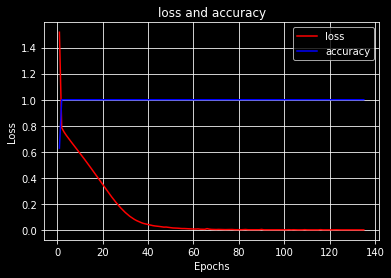

In [159]:
history_dict = history.history
loss_values = history_dict['loss']
val_accuracy = history_dict['accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='loss')
plt.plot(epochs, val_accuracy, 'b', label='accuracy')
plt.title('loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [160]:
network.evaluate(X_test,y_test)

2/2 [==============================] - 0s 19ms/step - loss: 0.0032 - accuracy: 1.0000


[0.003191398922353983, 1.0]

In [161]:
pred = network.predict_classes(X_test[:10])
for i in range(len(pred)):
    print(pred[i],'==>',y_test[i])

1 ==> [1.]
1 ==> [1.]
1 ==> [1.]
1 ==> [1.]
1 ==> [1.]
1 ==> [1.]
1 ==> [1.]
1 ==> [1.]
1 ==> [1.]
1 ==> [1.]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


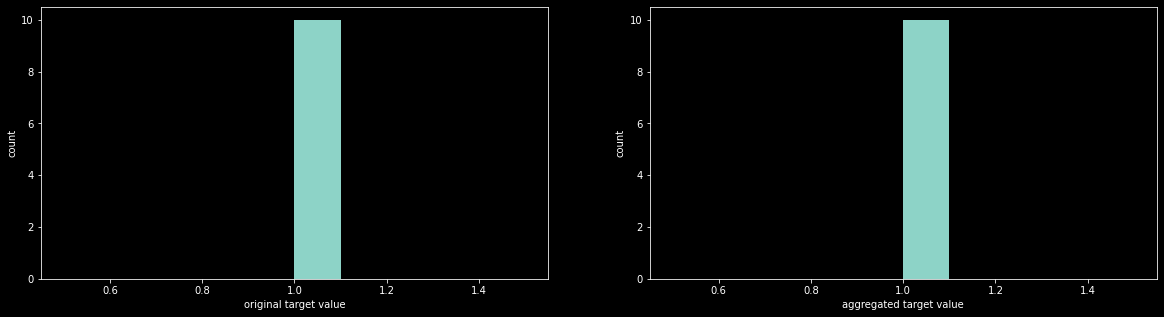

In [162]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(y_test[:10])
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(pred)
plt.xlabel('aggregated target value')
plt.ylabel('count')
plt.show()